# Predicting house prices with regression

Start with a simple problem, namely, predicting house prices in California. The problem is as follows: given several demographic and geographical attributes, such as the median income or the median house age in the block group. The goal is to predict the median value of a house in a particular area. As in the case of classification, from some training data that is obtained and then want to build a model that can be generalized to other data.

This is one of the built-in datasets that scikit-learn comes with, so it is very easy to load the data into memory:

In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

The housing object contains several attributes; in particular, housing.data contains the input data and
housing.target contains the price of houses in hundreds of thousands of dollars.

Start with a simple one-dimensional regression, trying to regress the price on a single attribute: the median income in the block group. The standard least squares regression method can be used.

The first attempt looks like this:

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

Import LinearRegression from the sklearn.linear_model module and construct a LinearRegression object. This object will behave analogously to the classifier objects from scikit-learn that was used earlier.

The feature that will be using is stored at position 0. The housing.target attribute contains the median house price (the target variable):

In [6]:
import numpy as np

# Feature 0 is the number of rooms.
x = housing.data[:, 0]
y = housing.target
x = np.transpose(np.atleast_2d(x))
lr.fit(x, y)

LinearRegression()

The only non-obvious line in this code block is the call to np.atleast_2d, which converts x from a one-dimensional to a two-dimensional array. Finally, for the dimensions to work out correctly and it is needed to transpose this array.

Note that methods are being called with fit and predict on the LinearRegression object, just as it was done with classifier objects, even though it is now performing regression. This regularity in the API is one of the nicer features of scikit-learn.

The fit can be easily plotted:

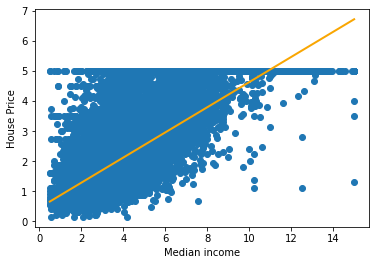

In [23]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x, y)
xmin = x.min()
xmax = x.max()
ax.plot([xmin, xmax], [lr.predict(np.atleast_2d(xmin)), lr.predict(np.atleast_2d(xmax))], '-', lw=2, color="#f9a602")
ax.set_xlabel("Median income")
ax.set_ylabel("House Price")
plt.show()

The preceding graph shows all the points (as dots) and the fit (the solid line).

Ideally, though, It is needed to measure how good a fit this is quantitatively. This will be critical in order to be able to compare alternative methods. To do so, how close the prediction is to the true values can be measured. For this task, the mean_squared_error function from the sklearn.metrics module can be used:

In [11]:
from sklearn.metrics import mean_squared_error

This function takes two arguments, the true values and the predictions, as follows:

In [6]:
mse = mean_squared_error(y, lr.predict(x))
print("Mean squared error (of training data): {:.3}".format(mse))

Mean squared error (of training data): 0.701


This value can sometimes be hard to interpret, and it's better to take the square root, to obtain the root mean square error (RMSE):

In [7]:
rmse = np.sqrt(mse)
print("RMSE (of training data): {:.3}".format(rmse))

RMSE (of training data): 0.837


One advantage of using RMSE is that it enable to quickly obtain a very rough estimate of the error by multiplying it by two. In this case, the estimated price can be expected to be different from the real price by, at most, 167,000 dollars.

Root mean squared error and prediction:
Root mean squared error corresponds approximately to an estimate of the standard deviation. Since most data is at most two standard deviations from the mean, by doubling the RMSE so that it obtains a rough confident interval. This is only completely valid if the errors are normally distributed, but it is often roughly correct even if they are not

A number such as 0.837 is still hard to immediately understand without domain knowledge. Is this a good prediction? One possible way to answer this question is to compare it with the most simple baseline, the constant model. This idea is formalized in the coefficient of determination: https://en.wikipedia.org/wiki/Coefficient_of_determination

The coefficient of determination can be obtained using the r2_score of the sklearn.metrics module:

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y, lr.predict(x))
print("R2 (on training data): {:.2}".format(r2))

R2 (on training data): 0.47


This measure is also called the r2 score. If linear regression is being used and the error on the training data is being evaluated, then it does correspond to the square of the correlation coefficient, R. However, this measure is more general, and may even return a negative value.

An alternative way to compute the coefficient of determination is to use the score method of the LinearRegression object:

In [9]:
r2 = lr.score(x, y)
print("R2 (on training data): {:.2}".format(r2))

R2 (on training data): 0.47


# Multidimensional regression

So far, only a single variable has been used for prediction: the median income. Now try to predict a single output (the median house price) based on multiple inputs.

The code looks very much like before. In fact, it's even simpler as the value of housing.data can be now passed  directly to the fit method:

In [10]:
x = housing.data
y = housing.target
lr.fit(x, y)

LinearRegression()

In [11]:
mse = mean_squared_error(y, lr.predict(x))
rmse = np.sqrt(mse)
print("RMSE (of training data): {:.2}".format(rmse))

RMSE (of training data): 0.72


In [12]:
r2 = r2_score(y, lr.predict(x))
print("R2 (on training data): {:.2}".format(r2))

R2 (on training data): 0.61


Using all the input variables, the root mean squared error is only 0.72, which corresponds to a coefficient of determination of 0.61. This is better than before, which indicates that the extra variables did help. But it can no longer easily display the regression line as before, because it has a 9-dimensional regression hyperplane instead of a single line

One good solution in this situation is to plot the prediction versus the actual value. The code is as follows:

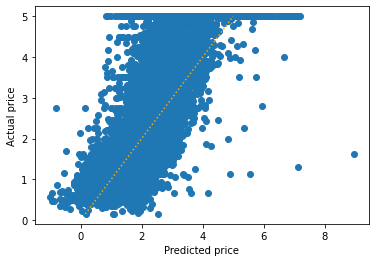

In [13]:
p = lr.predict(x)
fig, ax = plt.subplots()
ax.scatter(p, y)
ax.set_xlabel('Predicted price')
ax.set_ylabel('Actual price')
ax.plot([y.min(), y.max()], [[y.min()], [y.max()]], ':', color="#f9a602")
plt.show()

# Cross-validation for regression

When classification was introduced, the importance of cross-validation was stressed for checking the quality of the predictions. In fact, only the training errors have been discussed in this notebook so far.

This is a mistake if want to confidently infer the generalization ability. This should be still tested empirically, which it can be easily done with scikit-learn.

The Kfold class will be used to build a five-fold cross-validation loop and test the generalization ability of linear regression:

In [14]:
from sklearn.model_selection import KFold, cross_val_predict

kf = KFold(n_splits=5)
p = cross_val_predict(lr, x, y, cv=kf)
rmse_cv = np.sqrt(mean_squared_error(p, y))
print('RMSE on 5-fold CV: {:.2}'.format(rmse_cv))

RMSE on 5-fold CV: 0.75


In [15]:
r2 = r2_score(y, p)
print("R2 (on 5-fold CV): {:.2}".format(r2))

R2 (on 5-fold CV): 0.58


With cross-validation, a more conservative estimate  is obtained (that is, the error is larger): 0.75. As in the case of classification, the cross-validation estimate is a better estimate of how well it could be generalized to predict on unseen data.

Ordinary least squares is fast at learning time and returns a simple model, which is fast at prediction time. However, more advanced methods are now going to be explained and why they are sometimes preferable.

## Penalized or regularized regression

This section introduces penalized regression, also called regularized or penalized regression, an important class of regression models.

In ordinary regression, the returned fit is the best fit on the training data. Penalizing means that a penalty is added for over-confidence in the parameter values. Thus, a slightly worse fit is accepted in order to have a simpler model.

Another way to think about it is to consider that the default is that there is no relationship between the input variables and the output prediction. When data is obtained, this opinion is changed, but adding a penalty means that more data is required to convince that this is a strong relationship.

Penalized regression is about trade-offs:

Penalized regression is another example of the bias-variance trade-off. When using a penalty, a worse fit is resulted in the training data, as bias is added. On the other hand, the variance is reduced and tend to avoid over-fitting. Therefore, the overall result might generalize better to unseen (test) data.

### L1 and L2 penalties

Now explore these ideas in detail. Who do not care about some of the mathematical aspects should feel free to skip directly to the next section on how to use regularized regression in scikit-learn.

The problem, in general, is that given a matrix X of training data (rows are observations, and each column is a different feature), and a vector y of output values. The goal is to obtain a vector of weights, which it will be called b*. The ordinary least squares regression is given by the following formula:

# ![The ordinary least squares regression formula](./The%20ordinary%20least%20squares%20regression%20formula.PNG)

That is, vector b is found, which minimizes the squared distance to the target y. In these equations, the issue of setting an intercept is ignored by assuming that the training data has been preprocessed so that the mean of y is zero.

Adding a penalty or a regularization means that the best fit is not simply considered on the training data, but also how vector b is composed. There are two types of penalties that are typically used for regression: L1 and L2 penalties. An L1 penalty means that the regression is penalized by the sum of the absolute values of the coefficients, while an L2 penalty penalizes by the sum of squares.

When an L1 penalty is added, instead of the preceding equation, instead optimize the following:

# ![L1 penalty formula](./L1%20penalty%20formula.PNG)

Here, try to simultaneously make the error small, but also make the values of the coefficients small (in absolute terms). Using an L2 penalty means that it uses the following formula:

# ![L2 penalty formula](./L2%20penalty%20formula.PNG)

The difference is rather subtle: it now penalizes by the square of the coefficient rather than their absolute value. However, the difference in the results is dramatic

Ridge, Lasso, and ElasticNets:

These penalized models often go by rather interesting names. The L1 penalized model is often called the Lasso, while an L2 penalized one is known as Ridge regression. When using both, this is called an ElasticNet model.

Both the Lasso and the Ridge result in smaller coefficients than unpenalized regression (smaller in absolute value, ignoring the sign). However, the Lasso has an additional property: it results in many coefficients being set to exactly zero! This means that the final model does not even use some of its input features; the model is sparse. This is often a very desirable property as the model performs both feature selection and regression in a single step.

Whenever a penalty is added, a weight α is also added, which governs how much penalization. When α is close to zero, it is very close to unpenalized regression (in fact, if α is set to zero, it will simply perform OLS), and when α is large, the model is very different from the unpenalized one.

The Ridge model is older as the Lasso is hard to compute with pen and paper. However, with modern computers, the Lasso can be used as easily as Ridge, or even combine them to form ElasticNets. An ElasticNet has two penalties, one for the absolute value and the other for the squares, and it solves the following equation:

# ![ElasticNets formula](./ElasticNets%20formula.PNG)

This formula is a combination of the two previous ones, with two parameters, α1 and α2. Later in this notebook, it will be discussed how to choose a good value for parameters.

# Using Lasso or ElasticNet in scikit-learn

Adapt the preceding example to use ElasticNets. Using scikit-learn, it is very easy to swap in the ElasticNet regressor for the least squares one that we had before:

In [16]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.5)
las.fit(x, y)
r2 = r2_score(y, las.predict(x))
print("R2 (on training data): {:.2}".format(r2))

R2 (on training data): 0.45


In [17]:
kf = KFold(n_splits=5)
p = cross_val_predict(las, x, y, cv=kf)
r2 = r2_score(y, p)
print("R2 (on 5-fold CV): {:.2}".format(r2))

R2 (on 5-fold CV): 0.43


Now las is used, whereas earlier lr is used. When using Lasso, the R2 on the training data decreases to 0.45 (it was 0.61 before), but the cross-validation fit is now 0.43 (as opposed to 0.58 with linear regression). A larger error is traded on the training data in order to gain better generalization.

## Visualizing the Lasso path

Using scikit-learn, it can be easily visualized what happens as the value of the regularization parameter (alphas) changes. The California data will be again used, but now the Lasso regression object will be used:

In [18]:
las = Lasso()
alphas = np.logspace(-5, 2, 1000)
alphas, coefs, _ = las.path(x, y, alphas=alphas)

For each value in alphas, the path method on the Lasso object returns the coefficients that solve the Lasso problem with that parameter value. Because the result changes smoothly with alpha, this can be computed very efficiently.

A typical way to visualize this path is to plot the value of the coefficients as alpha decreases. It can be done so as follows:

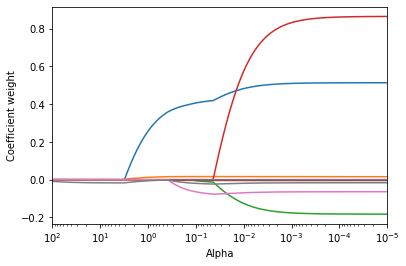

In [19]:
fig,ax = plt.subplots()
ax.plot(alphas, coefs.T)
# Set log scale
ax.set_xscale('log')
# Make alpha decrease from left to right
ax.set_xlim(alphas.max(), alphas.min())
ax.set_xlabel('Alpha')                              
ax.set_ylabel('Coefficient weight') 
plt.show()

In this plot, the x axis shows decreasing amounts of regularization from left to right (alpha is decreasing). The plot shows that when using very strong regularization (left side, very high alpha), the best solution is to have all values be exactly zero. As the regularization becomes weaker, one by one, the values of the different coefficients first shoot up, then stabilize. At some point, they all plateau as it is probably already closed to the unpenalized solution.

## P-greater-than-N scenarios

The title of this section is a bit of jargon, which it will be explained now. In the 1990s, first in the biomedical domain, and then on the web, problems started to appear where P was greater than N. What this meant was that the number of features, P, was greater than the number of examples, N (these letters were the conventional statistical shorthand for these concepts).

For example, if the input is a set of written documents, a simple way to approach it is to consider each possible word in the dictionary as a feature and regress on those. In the English language, it has over 20,000 words (this
is if some stemming are performed and only consider common words; it is more than ten times that if this preprocessing step is skipped). If there are only a few hundred or a few thousand examples, it will has more features than examples.

In this case, as the number of features is greater than the number of examples, it is possible to have a perfect fit on the training data. A set of regression coefficients with zero training errors can be found (in fact, more than one perfect solution can be found).

However, and this is a major problem, zero training error does not mean that the solution will generalize well. In earlier examples, regularization could give a little extra boost, but it is now absolutely required for a meaningful result.

## An example based on text documents

Now turn to an example that comes from a study performed at Carnegie Mellon University by Prof. Noah Smith's research group. The study was based on mining the so-called 10-K reports that companies file with the Securities and Exchange Commission (SEC) in the United States. The goal of their study was to predict, based on this piece of public information, what the future volatility of the company's stock would be. In the training data, historical data is being actually used for which the outcome is already known.

There are 16,087 examples available. The features, which have already been preprocessed, correspond to different words, 150,360 in total. In the introduction, it was stated that ordinary least regression is useful in these cases, and see why by attempting to blindly apply it.

The dataset is available in SVMLight format from multiple sources, including the book's companion website. SVMLight is, as the name says, a support vector machine implementation, which is also available through scikit-learn:

In [20]:
# !curl -O https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/E2006.train.bz2

In [21]:
from sklearn.datasets import load_svmlight_file

data, target = load_svmlight_file('E2006.train')

In the preceding code, data is a sparse matrix (that is, most of its entries are zeros and, therefore, only the nonzero entries are saved in memory), while the target is a simple one-dimensional vector. Start by looking at some attributes of the target:

In [22]:
print('Min target value: {}'.format(target.min()))
print('Max target value: {}'.format(target.max()))
print('Mean target value: {}'.format(target.mean()))
print('Std. dev. target: {}'.format(target.std()))

Min target value: -7.89957807346873
Max target value: -0.519409526940154
Mean target value: -3.5140531366944456
Std. dev. target: 0.6322783539114604


So, it can be seen that the data lies between -7.9 and -0.5. Now check what happens when OLS is used to predict. Note that the same classes and methods can be used exactly as we did earlier:

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data, target)
pred = lr.predict(data)
rmse_train = np.sqrt(mean_squared_error(target, pred))
print('RMSE on training: {:.2}'.format(rmse_train))
print('R2 on training: {:.2}'.format(r2_score(target, pred)))

RMSE on training: 0.018
R2 on training: 1.0


The root mean squared error is not exactly zero because of rounding errors, but it is very close.

The coefficient of determination is 1.0. That is, the linear model is reporting a perfect prediction on its training data. This is what previously expected.

In [24]:
kf = KFold(n_splits=5)
pred = cross_val_predict(lr, data, target, cv=kf)
rmse_cv = np.sqrt(mean_squared_error(pred, target))
print('RMSE on 5-fold CV: {:.2}'.format(rmse_cv))
r2 = r2_score(target, pred)
print("R2 (on 5-fold CV): {:.2}".format(r2))

RMSE on 5-fold CV: 0.73
R2 (on 5-fold CV): -0.35


However, when cross-validation is used (the code is very similar with earlier in the California example), we get something very different: RMSE of 0.73, which corresponds to a negative coefficient of determination of -0.35! This is the typical P-greater-than-N situation.

Training and generalization error:

When the number of features is greater than the number of examples, it always get zero training errors with OLS, except perhaps for issues due to rounding off. In fact, you may get zero training errors and have a completely useless model.

The natural solution is to use regularization to counteract the overfitting. The same cross-validation with an ElasticNet learner can be tried, having set the penalty parameter to 0.1:

In [25]:
from sklearn.linear_model import ElasticNet

met = ElasticNet(alpha=0.1)
met.fit(data, target)
pred = met.predict(data)
print('[EN 0.1] RMSE on training: {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN 0.1] R2 on training: {:.2}'.format(r2_score(target, pred)))

[EN 0.1] RMSE on training: 0.4
[EN 0.1] R2 on training: 0.61


Thus, it get worse results on the training data. However, it is a better hope that these results will generalize well:

In [26]:
kf = KFold(n_splits=5)
pred = cross_val_predict(met, data, target, cv=kf)
rmse = np.sqrt(mean_squared_error(target, pred))
print('[EN 0.1] RMSE on testing (5 fold): {:.2}'.format(rmse))
print('[EN 0.1] R2 on testing (5 fold): {:.2}'.format(r2_score(target, pred)))

[EN 0.1] RMSE on testing (5 fold): 0.4
[EN 0.1] R2 on testing (5 fold): 0.61


Indeed, they do! Unlike in the case for OLS, with ElasticNet, the result of cross-validation is the same as for the training data.

There is one problem with this solution, though, which is the choice of alpha. When using the default value (1.0), the result is very different (and worse).

In this case, we cheated as the author had previously tried a few values to see which ones would give a good result. The next section explains how to do it properly and how this is supported by scikit-learn.

## Setting hyperparameters in a principled way

In the preceding example, the penalty parameter was set to 0.1. If an overly large value is picked, it get underfitting. In an extreme case, the learning system will just return every coefficient equal to zero. If a value is picked too small, it is very close to OLS, which overfits and generalizes poorly (as it was been seen earlier).

How do we choose a good value?  A generic solution is to use cross-validation. a set of possible values are picked, and then use cross-validation to choose which one is best. This performs more computation (five times more if we use five folds), but is always applicable and unbiased.

It must be careful, though. In order to obtain an unbiased estimate of generalization, it must use two levels of cross-validation: the top level is to estimate the generalization power of the system, while the second level is to get good parameters. Start by holding out the first fold and will learn on the other four. Now, split these again into five folds in order to choose the parameters. Once the parameters have been set, test on the first fold. Now repeat this four other times:|

This leads to a lot of computation, but it is necessary in order to do things correctly. The problem is that if any datapoint is used to make any decisions about the model (including which parameters to set), that same datapoint can be no longer used to test the generalization ability of the model. This is a subtle point and it may not be immediately obvious. In fact, it is still the case that many users of machine learning get this wrong and overestimate how well their systems are doing, because they do not perform cross-validation correctly!

Fortunately, scikit-learn makes it very easy to do the right thing; it provides classes named LassoCV, RidgeCV, and ElasticNetCV, all of which encapsulate an inner cross-validation loop to optimize the necessary parameter (hence the letters CV at the end of the class name). The code is almost exactly like the previous one, except that it does not need to specify any value for alpha:

In [27]:
from sklearn.linear_model import ElasticNetCV

met = ElasticNetCV()
kf = KFold(n_splits=5)
p = cross_val_predict(met, data, target, cv=kf)
r2_cv = r2_score(target, p)
print("R2 ElasticNetCV: {:.2}".format(r2_cv))

R2 ElasticNetCV: 0.65


This results in a lot of computation, so, depending on how fast the computer is. Better performance can be obtained by taking advantage of multiple processors. To use four CPUs, make use of the following code:

In [28]:
met = ElasticNetCV(n_jobs=4)
kf = KFold(n_splits=5)
p = cross_val_predict(met, data, target, cv=kf)
r2_cv = r2_score(target, p)
print("R2 ElasticNetCV: {:.2}".format(r2_cv))

R2 ElasticNetCV: 0.65


Set the n_jobs parameter to -1 to use all the available CPUs:

In [29]:
met = ElasticNetCV(n_jobs=-1)
kf = KFold(n_splits=5)
p = cross_val_predict(met, data, target, cv=kf)
r2_cv = r2_score(target, p)
print("R2 ElasticNetCV: {:.2}".format(r2_cv))

R2 ElasticNetCV: 0.65


The question is, if ElasticNets has two penalties—the L1 and the L2 penalty—it is only needed to set a single value for alpha. In fact, the two values are specified by separately specifying the alpha and the l1_ratio variable. Then, α1 and α2 are set as follows (where ρ stands for l1_ratio):

# ![Alpha formula](./alpha%20formula.PNG)

In an intuitive sense, alpha sets the overall amount of regularization while l1_ratio sets the trade-off between the different types of regularization, L1 and L2.

It can be requested that the ElasticNetCV object tests different values of l1_ratio, as shown in the following code:

In [30]:
l1_ratio = [.01, .05, .25, .5, .75, .95, .99]
met = ElasticNetCV(l1_ratio=l1_ratio, n_jobs=-1)
kf = KFold(n_splits=5)
p = cross_val_predict(met, data, target, cv=kf)
r2_cv = r2_score(target, p)
print("R2 ElasticNetCV: {:.2}".format(r2_cv))

R2 ElasticNetCV: 0.65


This set of l1_ratio values is recommended in the documentation. It will test models that are almost like Ridge (when l1_ratio is 0.01 or 0.05) as well as models that are almost like Lasso (when l1_ratio is 0.95 or 0.99). Thus, a full range of different options is explored.

Because of its flexibility and its ability to use multiple CPUs, ElasticNetCV is an excellent default solution for regression problems when there is no any particular reason to prefer one type of model over the rest. In very simple problems, use ordinary least squares.

Putting all this together, the prediction versus real fit can be now visualized on this large dataset:

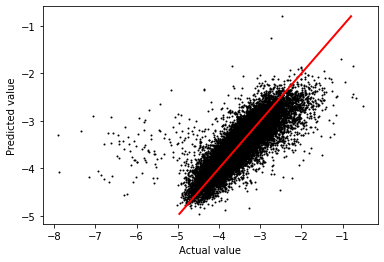

In [31]:
l1_ratio = [.01, .05, .25, .5, .75, .95, .99]
met = ElasticNetCV(l1_ratio=l1_ratio, n_jobs=-1)
pred = cross_val_predict(met, data, target, cv=kf)
fig, ax = plt.subplots()
ax.scatter(target, pred,  c='k', s=1)
ax.plot([pred.min(), pred.max()], [pred.min(), pred.max()], 'r-', lw=2)
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
plt.show()

It can be seen that the predictions do not match very well on the bottom end of the value range. This is perhaps because there are so many fewer elements on this end of the target range (this affects only a small minority of datapoints).

# Regression with TensorFlow

TensorFlow will be discussed in a future notebook, but regularized linear regression can be implemented with it, so it's good idea to get a feel for how TensorFlow works.

Try to use the California dataset for this experiment.

In [15]:
import tensorflow as tf

x = housing.data[:, 0][:, None]
y = np.reshape(housing.target, (-1, 1))

Two variables will be required, one for the slope and one for the intercept. Contrary to linear regression, far more code has to be written for the same functionality.

In [16]:
A = tf.Variable(tf.random.normal(shape=[1, 1]), name="A")
b = tf.Variable(tf.random.normal(shape=[1, 1]), name="b")

The two variables are fully static and have a dimension of [1, 1], meaning a single element. They will both be initialized by TensorFlow following a random variable (a Gaussian with a mean of 0 and a variance of 1).

All symbols can have a name and many TensorFlow functions take a name argument. It is good practice to give clear names, as TensorFlow errors will display them. If they are not set, TensorFlow will create new default names that can be difficult to decipher.

All the symbols are now created, and the loss function can be now created. The prediction first is created, and then it will be compared to the ground truth value:

In [17]:
def model_output(X):
    return tf.matmul(X, A) + b

def loss(Y, model_output):
    return tf.reduce_mean(tf.square(Y - model_output))

The multiplication for the prediction seems to be transposed, and this is due to the way X was defined: it is indeed transposed! This allows model_output to have a dynamic first dimension.

This cost function can be now minimized with a gradient descent. First the TensorFlow objects is created:

In [18]:
grad_step = 1e-3
my_opt = tf.keras.optimizers.SGD(learning_rate=grad_step)

def train_step(X, Y):
    with tf.GradientTape() as tape:
        predictions = model_output(X)
        square_loss = loss(Y, predictions)
    gradients = tape.gradient(square_loss, [A, b])
    my_opt.apply_gradients(zip(gradients, [A, b]))
    return square_loss

The gradient step is a crucial aspect of all TensorFlow objects. There are other optimizers available in TensorFlow; gradient descent is the simplest and one of the most adapted to this case.

Some variables are also needed:

In [19]:
batch_size = 100
n_epochs = 50000
steps = 1000

The batch size indicates how many elements at a time the loss is going to be computed for. This is also the dimension of the input data as well as the dimension of the output that will be predicted during the optimization.

Epochs are the number of times that all the training data is gone through to optimize the model. Finally, steps are just how often the information of the loss function is displayed that will be optimized.

Now go to the last step and let TensorFlow loose on the function and data we have:

In [37]:
loss_vec = []
for epoch in range(n_epochs):
    permut = np.random.permutation(len(x))
    for j in range(0, len(x), batch_size):
        batch = permut[j:j+batch_size]
        Xs = np.float32(x[batch])
        Ys = np.float32(y[batch])

        temp_loss = train_step(Xs, Ys)
    
    if epoch % steps == steps - 1:
        temp_loss = train_step(np.float32(x), np.float32(y))
        loss_vec.append(temp_loss)

        print('Epoch #{}  A = {} b = {}'.format(epoch, np.transpose(A), b.numpy()))
        print('Loss = {:.8f}'.format(temp_loss))
        print()

[slope, y_intercept] = [A, b]
prediction = model_output(np.float32(x))
mse = mean_squared_error(y, prediction)
print("Mean squared error (on training data): {:.3}".format(mse))
rmse = np.sqrt(mse)
print('RMSE (on training data): {}'.format(rmse))
r2 = r2_score(y, prediction)
print("R2 (on training data): {:.2}".format(r2))

Epoch #999  A = [[0.42362893]] b = [[0.45226964]]
Loss = 0.70185232

Epoch #1999  A = [[0.41876614]] b = [[0.45137346]]
Loss = 0.70114881

Epoch #2999  A = [[0.41885328]] b = [[0.45081148]]
Loss = 0.70114768

Epoch #3999  A = [[0.41801915]] b = [[0.450856]]
Loss = 0.70113128

Epoch #4999  A = [[0.42095074]] b = [[0.45167533]]
Loss = 0.70133513

Epoch #5999  A = [[0.41728958]] b = [[0.4505991]]
Loss = 0.70114112

Epoch #6999  A = [[0.41820183]] b = [[0.45093876]]
Loss = 0.70113271

Epoch #7999  A = [[0.4167821]] b = [[0.45101318]]
Loss = 0.70115656

Epoch #8999  A = [[0.42015025]] b = [[0.45102102]]
Loss = 0.70123267

Epoch #9999  A = [[0.41927]] b = [[0.4514292]]
Loss = 0.70117360

Epoch #10999  A = [[0.41622838]] b = [[0.45030776]]
Loss = 0.70119816

Epoch #11999  A = [[0.4129088]] b = [[0.4496466]]
Loss = 0.70169276

Epoch #12999  A = [[0.41350245]] b = [[0.4501007]]
Loss = 0.70155585

Epoch #13999  A = [[0.41933918]] b = [[0.4515016]]
Loss = 0.70117867

Epoch #14999  A = [[0.4166022

The first call in the session initializes all the variables according to what the spesification is when they were declared. Then there are two loops, one on epochs and one on batch sizes.

For each epoch, a permutation of the training data is defined. This randomizes the order of the data. This is important, especially for a neural network, so that they don't have bias and so they learn all the data consistently. If the batch size is equal to the size of the training data, then it doesn't need to randomize data, and this is usually the case when there is only a handful of data samples. For large datasets, batches have to be used. Each batch will be fed inside the train_step function and the variables will be optimized.

After each epoch, the loss is saved over all the training data for display purposes. The state of the variables are also displayed every few epochs to monitor and the state of the optimization is checked.

Finally, the mean square error of the predicted outputs is displayed with our model as well as the r2 score.

Of course, the solution for this loss function is analytically known, so modify it:

In [20]:
def loss(Y, model_output):
    beta = 0.5
    regularizer = tf.reduce_mean(tf.abs(A))
    return tf.reduce_mean(tf.square(Y - model_output)) + beta * regularizer

Then run the full optimization to get a Lasso result. It can be seen that TensorFlow doesn't really shine there. It is very slow and requires an awful number of iterations to get the result that is far from what scikit-learn can retrieve.

See a fraction of the run when using just feature 0 for this dataset:

In [21]:
def train_step(X, Y):
    with tf.GradientTape() as tape:
        predictions = model_output(X)
        regularization_loss = loss(Y, predictions)
    gradients = tape.gradient(regularization_loss, [A, b])
    my_opt.apply_gradients(zip(gradients, [A, b]))
    return regularization_loss

loss_vec = []
for epoch in range(n_epochs):
    permut = np.random.permutation(len(x))
    for j in range(0, len(x), batch_size):
        batch = permut[j:j+batch_size]
        Xs = np.float32(x[batch])
        Ys = np.float32(y[batch])

        temp_loss = train_step(Xs, Ys)
    
    if epoch % steps == steps - 1:
        temp_loss = train_step(np.float32(x), np.float32(y))
        loss_vec.append(temp_loss)

        print('Epoch #{}  A = {} b = {}'.format(epoch, np.transpose(A), b.numpy()))
        print('Loss = {:.8f}'.format(temp_loss))
        print()

[slope, y_intercept] = [A, b]
prediction = model_output(np.float32(x))
mse = mean_squared_error(y, prediction)
print("Mean squared error (on training data): {:.3}".format(mse))
rmse = np.sqrt(mse)
print('RMSE (on training data): {}'.format(rmse))
r2 = r2_score(y, prediction)
print("R2 (on training data): {:.2}".format(r2))

Epoch #999  A = [[0.3466879]] b = [[0.7183697]]
Loss = 0.89287269

Epoch #1999  A = [[0.34424287]] b = [[0.7179804]]
Loss = 0.89321554

Epoch #2999  A = [[0.34619436]] b = [[0.718332]]
Loss = 0.89292032

Epoch #3999  A = [[0.35097465]] b = [[0.7194998]]
Loss = 0.89290065

Epoch #4999  A = [[0.3493174]] b = [[0.71922547]]
Loss = 0.89279318

Epoch #5999  A = [[0.34191653]] b = [[0.7173985]]
Loss = 0.89379275

Epoch #6999  A = [[0.35017505]] b = [[0.71917826]]
Loss = 0.89283156

Epoch #7999  A = [[0.34968525]] b = [[0.71946955]]
Loss = 0.89280856

Epoch #8999  A = [[0.3499094]] b = [[0.7194162]]
Loss = 0.89281899

Epoch #9999  A = [[0.34880397]] b = [[0.71900403]]
Loss = 0.89278376

Epoch #10999  A = [[0.3544378]] b = [[0.7202129]]
Loss = 0.89351439

Epoch #11999  A = [[0.35127455]] b = [[0.7196611]]
Loss = 0.89293534

Epoch #12999  A = [[0.35062802]] b = [[0.7196278]]
Loss = 0.89287168

Epoch #13999  A = [[0.35142168]] b = [[0.71932435]]
Loss = 0.89294398

Epoch #14999  A = [[0.34807366]

Here is how the loss function behaves:

<Figure size 432x288 with 0 Axes>

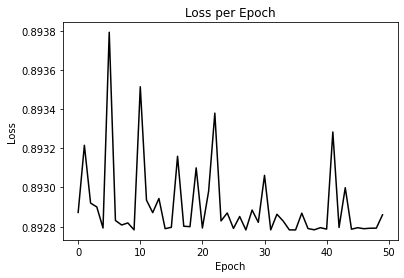

In [24]:
best_fit = []
for i in x:
    best_fit.append(slope[0] * i + y_intercept[0])

plt.figure()
fig,ax = plt.subplots()
ax.set_title('Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

ax.plot(loss_vec, 'k-')
plt.show()

Here is the result when using only the first feature:

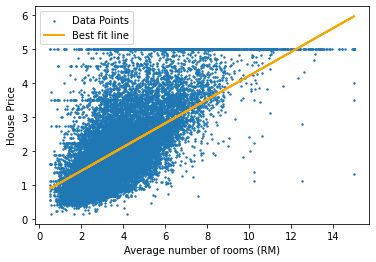

In [25]:
fig, ax = plt.subplots()
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")

ax.scatter(x, y, s=2, label='Data Points')
ax.plot(x, np.array(best_fit), '-', lw=2, color="#f9a602", label='Best fit line')
ax.legend(loc='upper left')
plt.show()